<a href="https://colab.research.google.com/github/pedro-delima/Data-Science-transformando-vari-veis-para-uma-Regress-o-Linear/blob/main/transformando_Variaveis_para_regressao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

In [4]:
dados = pd.read_csv('/content/precos_casas.csv')

In [ ]:
dados.head()

,valor,area_primeiro_andar,existe_segundo_andar,area_quintal,dist_metro,dist_parque
0,1042500,79.52,1,23.86,1.639,3.039
1,907500,117.24,0,35.17,1.538,10.910
2,1117500,85.47,1,25.64,1.275,11.791
3,700000,89.28,1,21.07,1.223,10.877
4,1250000,106.37,1,31.91,0.868,11.247


In [5]:
dados.shape

(1460, 6)

In [6]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   valor                 1460 non-null   int64  
 1   area_primeiro_andar   1460 non-null   float64
 2   existe_segundo_andar  1460 non-null   int64  
 3   area_quintal          1460 non-null   float64
 4   dist_metro            1460 non-null   float64
 5   dist_parque           1460 non-null   float64
dtypes: float64(4), int64(2)
memory usage: 68.6 KB


In [7]:
corr = dados.corr().round(3)
corr

,valor,area_primeiro_andar,existe_segundo_andar,area_quintal,dist_metro,dist_parque
valor,1.000,0.606,0.138,0.614,-0.644,-0.071
area_primeiro_andar,0.606,1.000,-0.339,0.820,-0.369,-0.058
existe_segundo_andar,0.138,-0.339,1.000,-0.301,-0.191,-0.007
area_quintal,0.614,0.820,-0.301,1.000,-0.440,-0.058
dist_metro,-0.644,-0.369,-0.191,-0.440,1.000,0.089
dist_parque,-0.071,-0.058,-0.007,-0.058,0.089,1.000


In [8]:
corr['valor'].to_frame()

,valor
valor,1.000
area_primeiro_andar,0.606
existe_segundo_andar,0.138
area_quintal,0.614
dist_metro,-0.644
dist_parque,-0.071


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

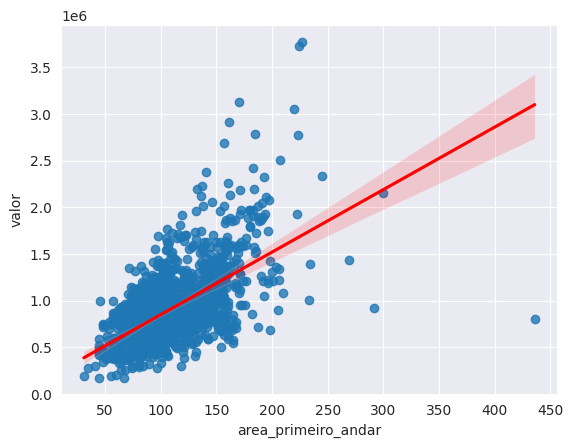

In [10]:
sns.set_style('darkgrid')
sns.regplot(x='area_primeiro_andar', y='valor', data=dados, line_kws={'color': 'red'})
plt.show()

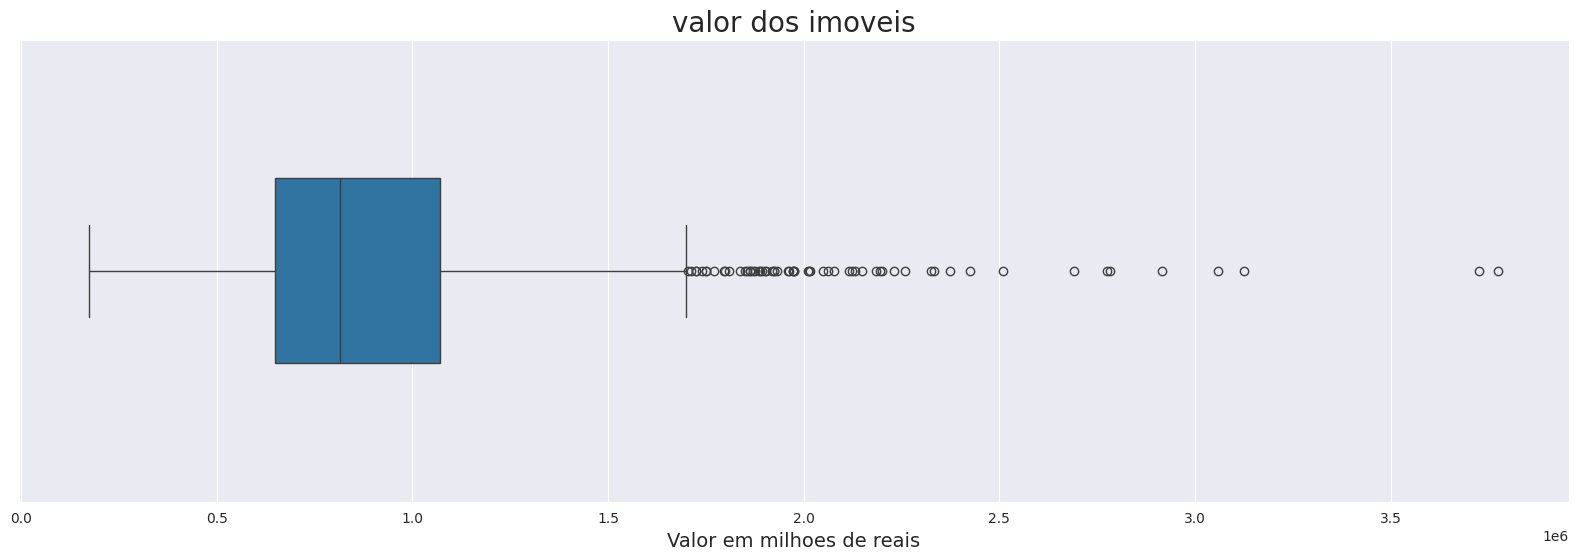

In [11]:
ax = sns.boxplot(x='valor', data=dados, width=0.4)
ax.figure.set_size_inches(20, 6)
ax.set_title('valor dos imoveis', fontsize=20)
ax.set_xlabel('Valor em milhoes de reais', fontsize=14)
plt.show()

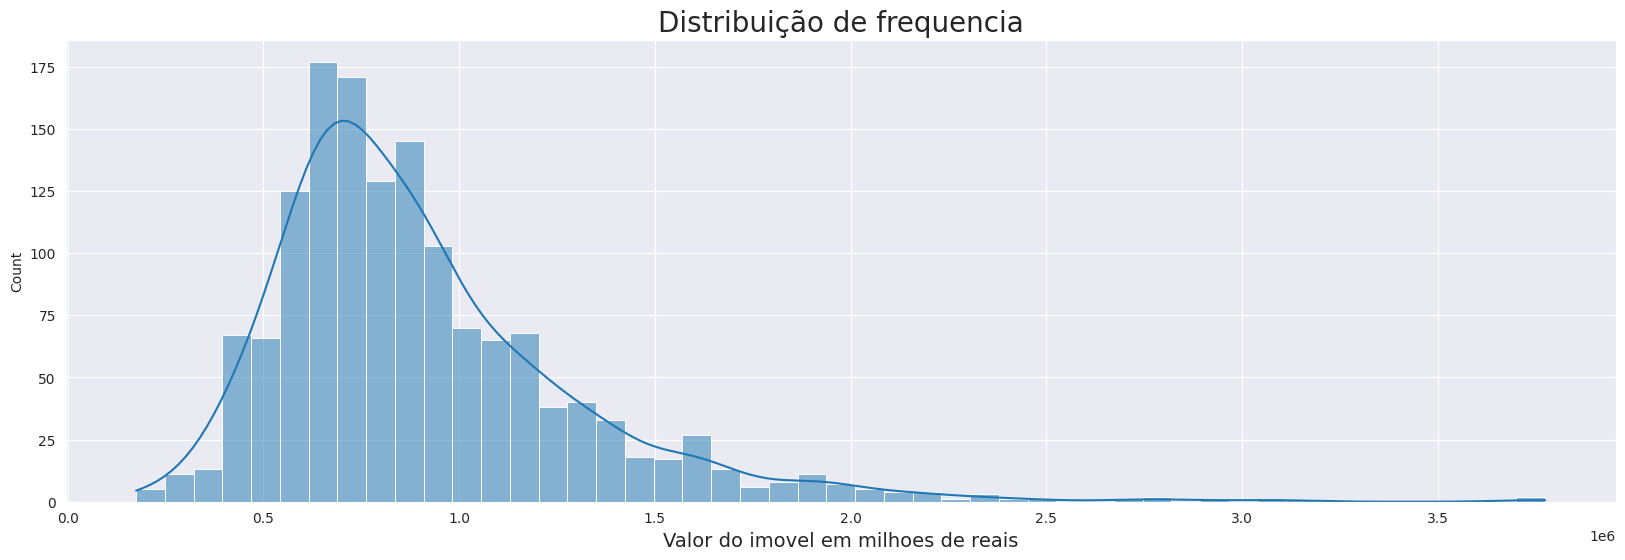

In [12]:
ax = sns.histplot(data=dados, x='valor', kde=True)

ax.figure.set_size_inches(20, 6)
ax.set_title('Distribuição de frequencia', fontsize=20)
ax.set_xlabel('Valor do imovel em milhoes de reais', fontsize=14)
plt.show()

In [13]:
dados.columns

Index(['valor', 'area_primeiro_andar', 'existe_segundo_andar', 'area_quintal',
       'dist_metro', 'dist_parque'],
      dtype='object')

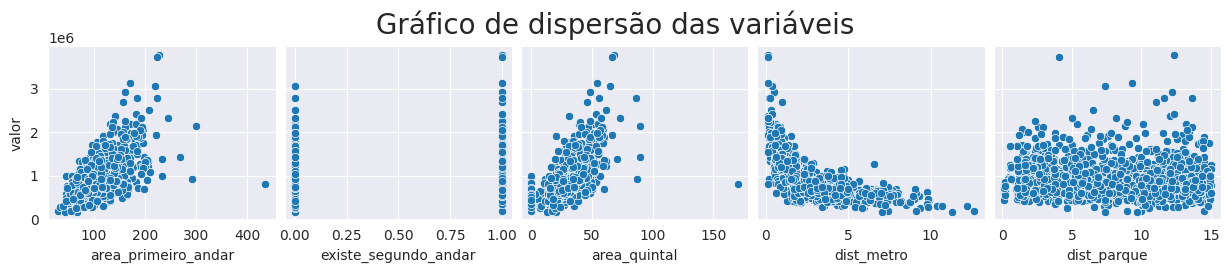

In [14]:
ax = sns.pairplot(data=dados, y_vars='valor', x_vars=['area_primeiro_andar', 'existe_segundo_andar', 'area_quintal',
       'dist_metro', 'dist_parque'])
ax.figure.suptitle('Gráfico de dispersão das variáveis', fontsize=20, y=1.05)
plt.show()

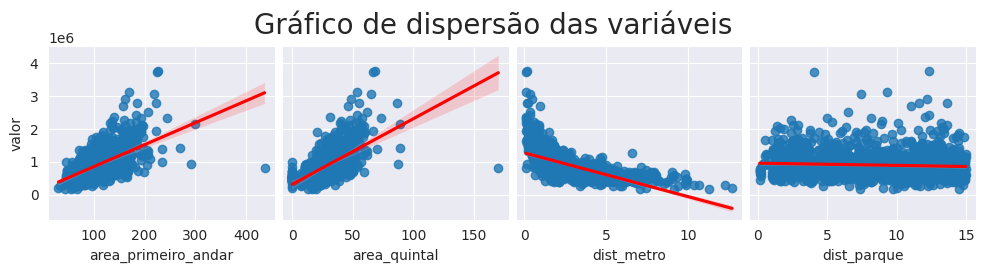

In [15]:
ax = sns.pairplot(data=dados, y_vars='valor', x_vars=['area_primeiro_andar', 'area_quintal',
       'dist_metro', 'dist_parque'], kind='reg', plot_kws={'line_kws': {'color': 'red'}})
ax.figure.suptitle('Gráfico de dispersão das variáveis', fontsize=20, y=1.05)
plt.show()

In [16]:
import numpy as np


In [17]:
dados.describe().round(2)

,valor,area_primeiro_andar,existe_segundo_andar,area_quintal,dist_metro,dist_parque
count,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00
mean,904605.98,108.01,0.43,29.47,2.77,8.15
std,397212.51,35.92,0.50,12.23,1.91,4.20
min,174500.00,31.03,0.00,0.00,0.10,0.12
25%,649875.00,81.94,0.00,22.18,1.42,4.44
50%,815000.00,100.98,0.00,27.64,2.26,8.72
75%,1070000.00,129.25,1.00,36.18,3.89,11.63
max,3775000.00,435.90,1.00,170.29,12.65,15.00


In [18]:
dados['log_valor'] = np.log(dados['valor'])
dados['log_area_primeiro_andar'] = np.log(dados['area_primeiro_andar'])
dados['log_area_quintal'] = np.log1p(dados['area_quintal'])
dados['log_dist_metro'] = np.log(dados['dist_metro'])
dados['log_dist_parque'] = np.log(dados['dist_parque'])

In [19]:
dados.head(3)

,valor,area_primeiro_andar,existe_segundo_andar,area_quintal,dist_metro,dist_parque,log_valor,log_area_primeiro_andar,log_area_quintal,log_dist_metro,log_dist_parque
0,1042500,79.52,1,23.86,1.639,3.039,13.857132,4.376009,3.213260,0.494086,1.111529
1,907500,117.24,0,35.17,1.538,10.910,13.718449,4.764223,3.588230,0.430483,2.389680
2,1117500,85.47,1,25.64,1.275,11.791,13.926605,4.448165,3.282414,0.242946,2.467337


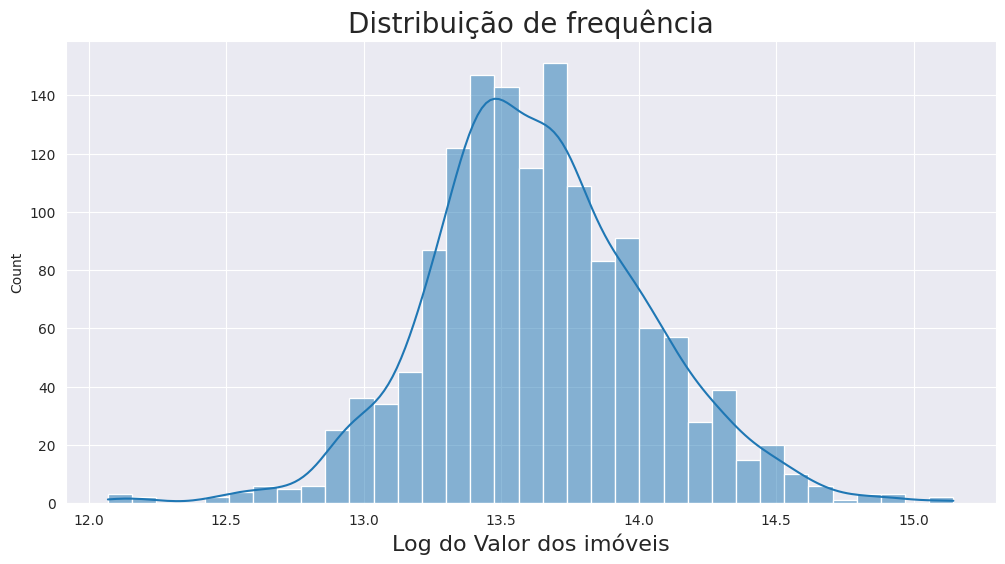

In [20]:
ax = sns.histplot(dados['log_valor'], kde=True)

ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de frequência', fontsize=20)
ax.set_xlabel('Log do Valor dos imóveis', fontsize=16)
plt.show()

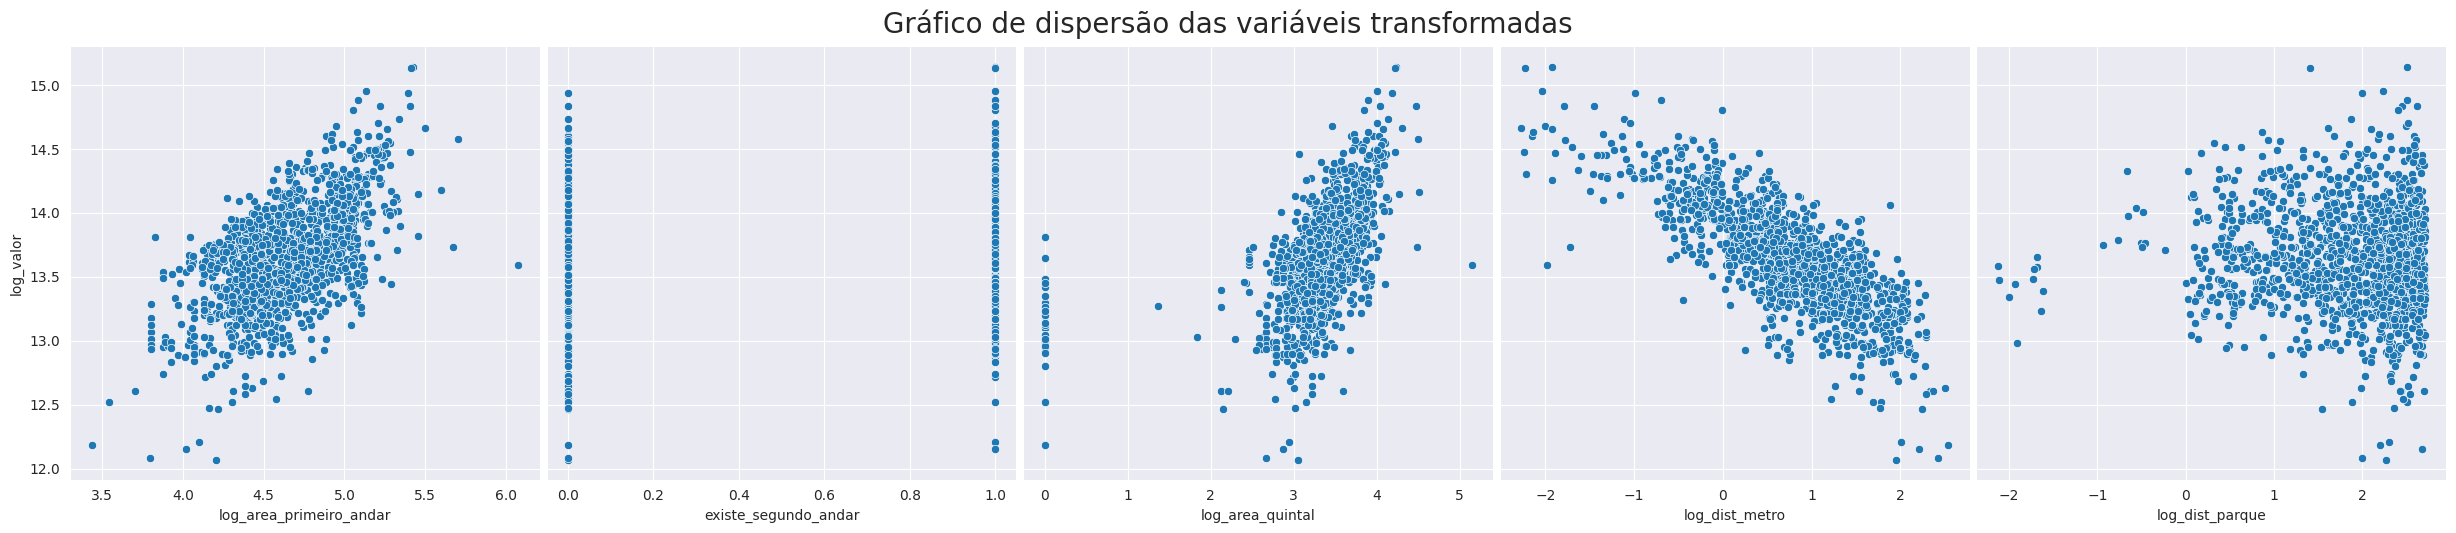

In [21]:
ax = sns.pairplot(data=dados, y_vars='log_valor', x_vars=['log_area_primeiro_andar', 'existe_segundo_andar', 'log_area_quintal',
       'log_dist_metro', 'log_dist_parque'], height=5)
ax.figure.suptitle('Gráfico de dispersão das variáveis transformadas', fontsize=20, y=1.05)
plt.show()

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
y = dados['log_valor']
X = dados[['log_area_primeiro_andar', 'existe_segundo_andar', 'log_area_quintal', 'log_dist_metro', 'log_dist_parque']]

In [24]:
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
    Split arrays or matrices into random train and test subsets.
    
    Quick utility that wraps input validation,
    ``next(ShuffleSplit().split(X, y))``, and application to input data
    into a single call for splitting (and optionally subsampling) data into a
    one-liner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to

In [25]:
X_train, X_test, y_train, y_test = train_test_split(
 X, y, test_size=0.3, random_state=1991)

In [26]:
X_train

,log_area_primeiro_andar,existe_segundo_andar,log_area_quintal,log_dist_metro,log_dist_parque
480,5.146738,0,3.952973,-1.158362,1.092930
175,5.300714,0,3.540959,0.579978,2.571467
891,4.445940,1,3.280535,0.758935,2.424537
101,4.508329,1,3.075005,0.948177,0.506215
403,4.684259,1,3.490429,-0.050241,1.863770
...,...,...,...,...,...
519,4.775250,1,3.598955,0.431133,2.296768
397,4.399130,1,3.222071,1.425515,0.215111
1331,4.484470,0,3.272985,1.203273,1.000632
1102,4.657288,0,3.372455,1.310223,1.360977


In [27]:
X_test.shape

(438, 5)

In [28]:
import statsmodels.api as sm

In [29]:
X_train_com_constante = sm.add_constant(X_train)

In [30]:
X_train_com_constante.head()

,const,log_area_primeiro_andar,existe_segundo_andar,log_area_quintal,log_dist_metro,log_dist_parque
480,1.0,5.146738,0,3.952973,-1.158362,1.092930
175,1.0,5.300714,0,3.540959,0.579978,2.571467
891,1.0,4.445940,1,3.280535,0.758935,2.424537
101,1.0,4.508329,1,3.075005,0.948177,0.506215
403,1.0,4.684259,1,3.490429,-0.050241,1.863770


In [31]:
modelo_statsmodels = sm.OLS(y_train, X_train_com_constante, hasconst=True).fit()
print(modelo_statsmodels.summary())

                            OLS Regression Results                            
Dep. Variable:              log_valor   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     641.1
Date:                Thu, 10 Jul 2025   Prob (F-statistic):          3.38e-311
Time:                        10:40:30   Log-Likelihood:                 214.53
No. Observations:                1022   AIC:                            -417.1
Df Residuals:                    1016   BIC:                            -387.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [33]:
X_train_novo = X_train.drop('log_dist_parque', axis=1)
X_test_novo = X_test.drop('log_dist_parque', axis=1)

In [34]:
X_train_novo.head()

,log_area_primeiro_andar,existe_segundo_andar,log_area_quintal,log_dist_metro
480,5.146738,0,3.952973,-1.158362
175,5.300714,0,3.540959,0.579978
891,4.445940,1,3.280535,0.758935
101,4.508329,1,3.075005,0.948177
403,4.684259,1,3.490429,-0.050241


In [35]:
modelo = LinearRegression()

In [36]:
modelo.fit(X_train_novo, y_train)

LinearRegression()

In [37]:
print(f'R2 = {modelo.score(X_train_novo, y_train)}')

R2 = 0.7590075723153901


In [38]:
y_previsto = modelo.predict(X_test_novo)

In [39]:
print(f'R2 = {metrics.r2_score(y_test, y_previsto)}')

R2 = 0.7378359990789667


In [40]:
modelo.feature_names_in_

array(['log_area_primeiro_andar', 'existe_segundo_andar',
       'log_area_quintal', 'log_dist_metro'], dtype=object)

In [41]:
nova_casa = pd.DataFrame({
    'log_area_primeiro_andar': [np.log(150)],
    'existe_segundo_andar': [1],
    'log_area_quintal': [np.log1p(80)],
    'log_dist_metro': [np.log(2)]
})

In [42]:
modelo.predict(nova_casa)

array([14.03348183])

In [43]:
print(f'R$ {np.exp(modelo.predict(nova_casa)[0]):,.2f}')

R$ 1,243,551.34


In [44]:
modelo.intercept_

np.float64(11.174572203750294)

In [45]:
np.exp(modelo.intercept_)

np.float64(71294.33881566528)

In [46]:
modelo.coef_

array([ 0.49955726,  0.1877953 ,  0.07936964, -0.26079708])

In [50]:
index = ['intercepto', 'log_area_primeiro_andar', 'existe_segundo_andar', 'log_area_quintal', 'log_dist_metro', ]

In [51]:

df_params = pd.DataFrame(data = np.append(modelo.intercept_, modelo.coef_), index=index, columns=['Parâmetros'])

In [52]:
df_params.round(3)

,Parâmetros
intercepto,11.175
log_area_primeiro_andar,0.500
existe_segundo_andar,0.188
log_area_quintal,0.079
log_dist_metro,-0.261


In [53]:
print(f'Efeito da dummy: {100 * np.expm1(df_params.loc["existe_segundo_andar"][0]):.2f}%')

Efeito da dummy: 20.66%


/tmp/ipython-input-53-746621094.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'Efeito da dummy: {100 * np.expm1(df_params.loc["existe_segundo_andar"][0]):.2f}%')


In [55]:
y_train_previsto = modelo.predict(X_train_novo)

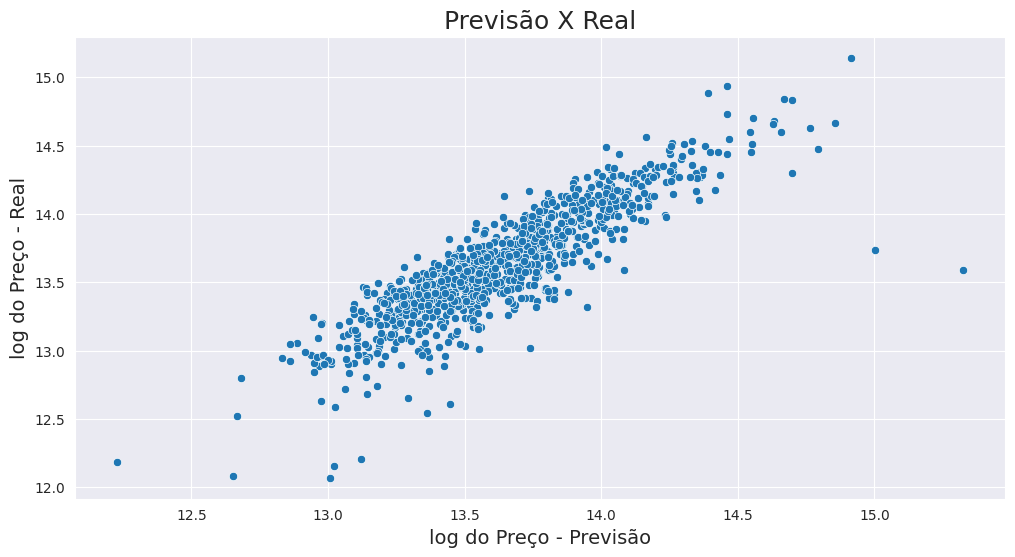

In [56]:
ax = sns.scatterplot(x=y_train_previsto, y=y_train)

ax.figure.set_size_inches(12, 6)
ax.set_title('Previsão X Real', fontsize=18)
ax.set_xlabel('log do Preço - Previsão', fontsize=14)
ax.set_ylabel('log do Preço - Real', fontsize=14)
plt.show()

In [57]:
residuo = y_train - y_train_previsto

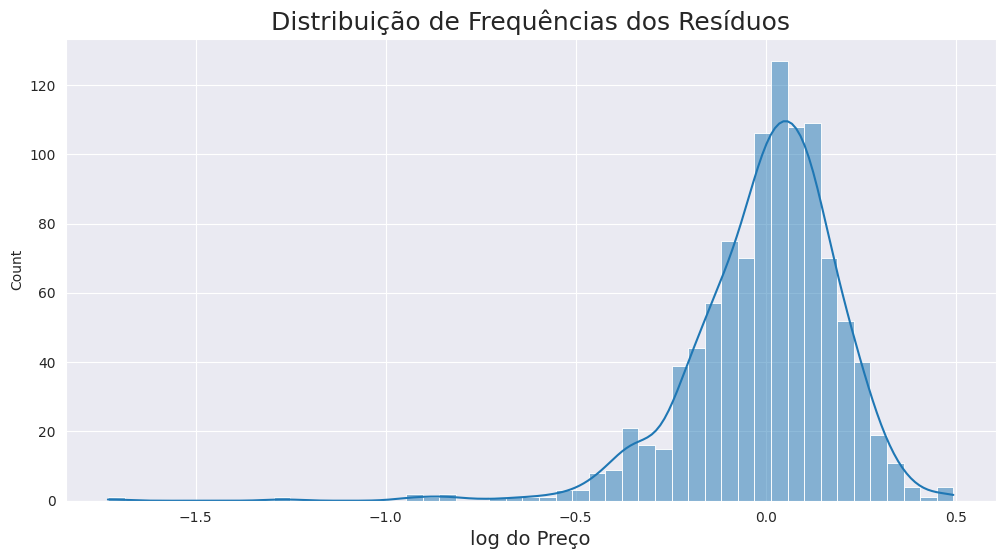

In [58]:
ax = sns.histplot(residuo, kde = True)

ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências dos Resíduos', fontsize=18)
ax.set_xlabel('log do Preço', fontsize=14)
plt.show()

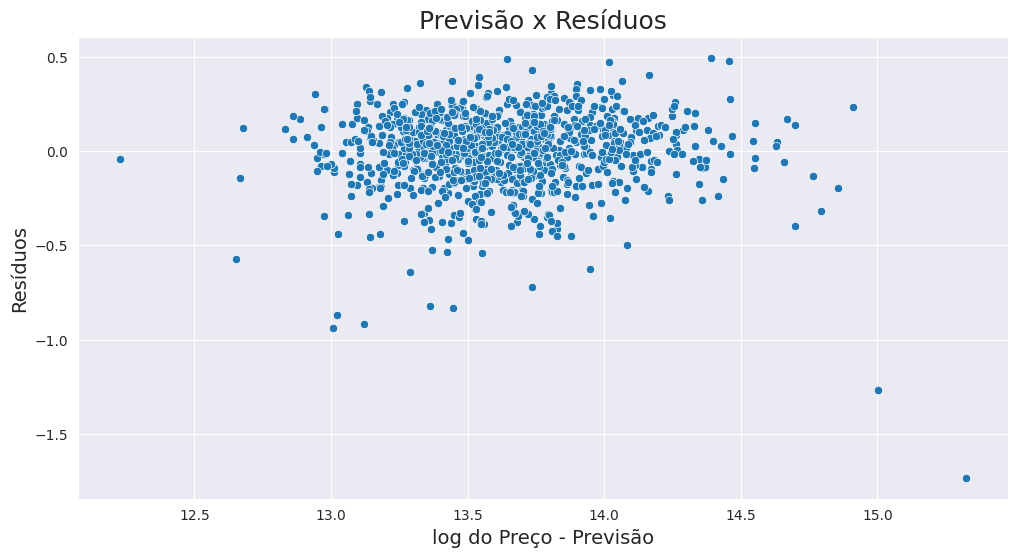

In [59]:
ax = sns.scatterplot(x=y_train_previsto, y=residuo)

ax.figure.set_size_inches(12, 6)
ax.set_title('Previsão x Resíduos', fontsize=18)
ax.set_xlabel('log do Preço - Previsão', fontsize=14)
ax.set_ylabel('Resíduos', fontsize=14)
plt.show()

In [60]:
import pickle

In [61]:
arquivo = open('modelo_casas_a_especificar.pkl', 'wb')
pickle.dump(modelo, arquivo)
arquivo.close()

In [62]:
import pandas as pd
import numpy as np

In [66]:
casas = pd.read_csv('casas_a_precificar.csv')
casas.head()

,area_primeiro_andar,existe_segundo_andar,area_quintal,dist_metro
0,180,1,40,8.0
1,130,0,80,1.0
2,170,1,60,7.5
3,250,1,70,4.0
4,260,0,70,8.5


In [67]:
casas.columns = ["log_area_primeiro_andar", "existe_segundo_andar", "log_area_quintal", "log_dist_metro"]

In [68]:
casas["log_area_primeiro_andar"] = np.log(casas["log_area_primeiro_andar"])
casas["log_area_quintal"] = np.log(casas["log_area_quintal"])
casas["log_dist_metro"] = np.log(casas["log_dist_metro"])

In [69]:
casas["log_area_primeiro_andar"] = np.log(casas["log_area_primeiro_andar"])
casas["log_area_quintal"] = np.log1p(casas["log_area_quintal"])
casas["log_dist_metro"] = np.log(casas["log_dist_metro"])

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [70]:
casas

,log_area_primeiro_andar,existe_segundo_andar,log_area_quintal,log_dist_metro
0,1.647303,1,1.545194,0.732099
1,1.582588,0,1.683065,-inf
2,1.636235,1,1.628131,0.700571
3,1.708642,1,1.657941,0.326634
4,1.715721,0,1.657941,0.760837
5,1.667389,0,1.781986,-0.902720
6,1.741130,0,1.781986,0.475885
7,1.566007,0,1.628131,0.834032
8,1.566007,1,1.723689,-0.902720
9,1.566007,1,1.545194,0.700571


In [72]:
import pickle

In [74]:
m = open('/content/modelo_casas_a_especificar.pkl', 'rb')
modelo = pickle.load(m)
m.close()

In [78]:
import numpy as np

# Substituir -inf e inf por NaN
casas.replace([np.inf, -np.inf], np.nan, inplace=True)

# Preencher os NaNs com a média da coluna
casas.fillna(casas.mean(), inplace=True)

In [80]:
previsoes = modelo.predict(casas)
previsoes

array([12.11700189, 12.01978052, 12.12627803, 12.26233722, 11.96483915,
       12.38439104, 12.06169225, 11.86859313, 12.51691295, 12.08461206])

In [81]:
for i, previsao in enumerate(previsoes):
    print(f'Casa {i+1}: R$ {previsao:,.2f}')

Casa 1: R$ 12.12
Casa 2: R$ 12.02
Casa 3: R$ 12.13
Casa 4: R$ 12.26
Casa 5: R$ 11.96
Casa 6: R$ 12.38
Casa 7: R$ 12.06
Casa 8: R$ 11.87
Casa 9: R$ 12.52
Casa 10: R$ 12.08


In [82]:
for i, previsao in enumerate(previsoes):
    print(f'Casa {i+1}: R$ {np.exp(previsao):,.2f}')

Casa 1: R$ 182,956.17
Casa 2: R$ 166,006.22
Casa 3: R$ 184,661.19
Casa 4: R$ 211,575.51
Casa 5: R$ 157,131.63
Casa 6: R$ 239,041.16
Casa 7: R$ 173,111.69
Casa 8: R$ 142,713.32
Casa 9: R$ 272,914.26
Casa 10: R$ 177,125.19
